<a href="https://colab.research.google.com/github/cristianpaladines/Datascience-challenge-2-Telecom-X/blob/main/1_Challenge_TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCCIÓN**

## **Contexto del Proyecto: Telecom X - Análisis de Evasión**

Este proyecto se enmarca en la necesidad crítica de Telecom X por comprender y mitigar la pérdida de clientes, un fenómeno conocido como Churn. En el competitivo sector de las telecomunicaciones, la retención de usuarios es vital, ya que el costo de adquirir un nuevo cliente supera significativamente el de mantener a uno actual.

## **El Problema de Negocio**

La empresa ha detectado una tasa de cancelaciones inusualmente alta. El objetivo primordial de este análisis es identificar los patrones, comportamientos y características que distinguen a los clientes que abandonan el servicio de aquellos que permanecen leales.

## **Objetivos del Informe**

- Identificar factores clave: Determinar qué variables (cargos, tiempo de contrato, servicios) influyen más en la decisión de evasión.
- Extraer Insights Estratégicos: Transformar los datos crudos en información accionable para el departamento de retención.
- Preparación para Ciencia de Datos: Sentar las bases para el desarrollo futuro de modelos predictivos que permitan anticipar el Churn.

#📌 Extracción

In [1]:
import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

peticion = requests.get(url)
formato_python = peticion.json()
df = pd.DataFrame(formato_python)

In [2]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df = pd.json_normalize(formato_python)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

1. Verificación tipos de valores

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

2. Verificación valores nulos

In [5]:
print(f'Numero de valores nulos:\n{df.isnull().sum()}')

Numero de valores nulos:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


3. Verficación valores unicos

In [6]:
for col in df.columns:
  print(f'Valores unicos en la columna {col}: {df[col].nunique()}')
  print(f'{col}:{df[col].unique()}')
  print('--' * 50)

Valores unicos en la columna customerID: 7267
customerID:['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
----------------------------------------------------------------------------------------------------
Valores unicos en la columna Churn: 3
Churn:['No' 'Yes' '']
----------------------------------------------------------------------------------------------------
Valores unicos en la columna customer.gender: 2
customer.gender:['Female' 'Male']
----------------------------------------------------------------------------------------------------
Valores unicos en la columna customer.SeniorCitizen: 2
customer.SeniorCitizen:[0 1]
----------------------------------------------------------------------------------------------------
Valores unicos en la columna customer.Partner: 2
customer.Partner:['Yes' 'No']
----------------------------------------------------------------------------------------------------
Valores unicos en la columna customer.Dependents

4. Verificación valores duplicados

In [7]:
print(f'Numero de registros duplicados: {df.duplicated().sum()}')

Numero de registros duplicados: 0


5. Verificación valores vacios o en blanco

In [8]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


## Transofromacion de los datos inconsistentes

### 1. Cambiando el tipo de valor de la columna `account.Charges.Total` a float

In [9]:
# errors='coerce' convierte lo que no sea número en NaN (nulo)
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [10]:
print(f'Numero de valores nulos:\n{df.isnull().sum()}')

Numero de valores nulos:
customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


### 2. Eliminación de valores vacios en la columna `Churn`

In [11]:
# df[df[...]] = Muéstrame únicamente las filas donde el resultado de mi pregunta fue True y descarta las que fueron False
df = df[df['Churn'].str.strip() != '']
print(f'Numero de filas despues de eliminar los valores vacios en "Churn": {len(df)}')

# Vacios & nulos
# df = df[ (df['Churn'].str.strip() != '') & (df['Churn'].notnull()) ]

Numero de filas despues de eliminar los valores vacios en "Churn": 7043


In [12]:
type(df['Churn'] == 'Yes')

pandas.core.series.Series

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [14]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [15]:
df = df.dropna(subset=['account.Charges.Total'])
print(f'Numero de valores nulos:\n{df.isnull().sum()}')

Numero de valores nulos:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


#📊 Carga y análisis

### 1. Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [16]:
df.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


In [17]:
print(f'Valores unicos de la columna "customer.SeniorCitizen": {df['customer.SeniorCitizen'].unique()}')
print(f'Conteo de los valores de la columna "customer.SeniorCitizen":\n {df['customer.SeniorCitizen'].value_counts()}')

Valores unicos de la columna "customer.SeniorCitizen": [0 1]
Conteo de los valores de la columna "customer.SeniorCitizen":
 customer.SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64


In [18]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 2. En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [19]:
import matplotlib.pyplot as plt

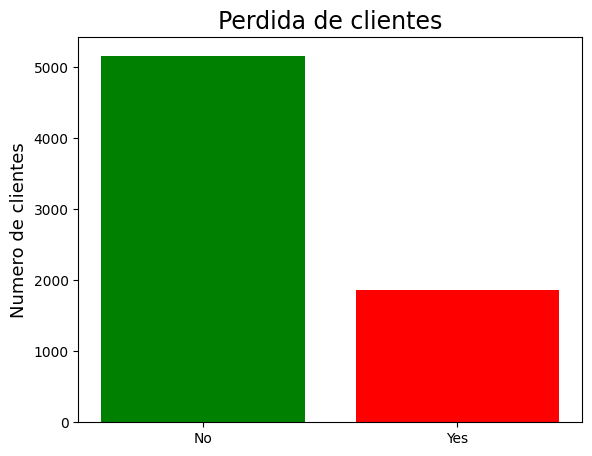

In [20]:
fig, ax = plt.subplots(figsize=(6.5,5))

ax.bar(df['Churn'].value_counts().index, df['Churn'].value_counts().values, color=['green', 'red'])
ax.set_title('Perdida de clientes', loc='center', fontsize=17)
ax.set_xlabel('')
ax.set_ylabel('Numero de clientes', fontsize=13)

plt.show()

### 3. Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como **género**, **tipo de contrato**, **método de pago**, entre otras. Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [21]:
import seaborn as sns

In [22]:
df.groupby(['customer.gender', 'Churn'])['Churn'].count()

customer.gender  Churn
Female           No       2544
                 Yes       939
Male             No       2619
                 Yes       930
Name: Churn, dtype: int64

/tmp/ipython-input-748204256.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(metodos_pago, fontsize=9)


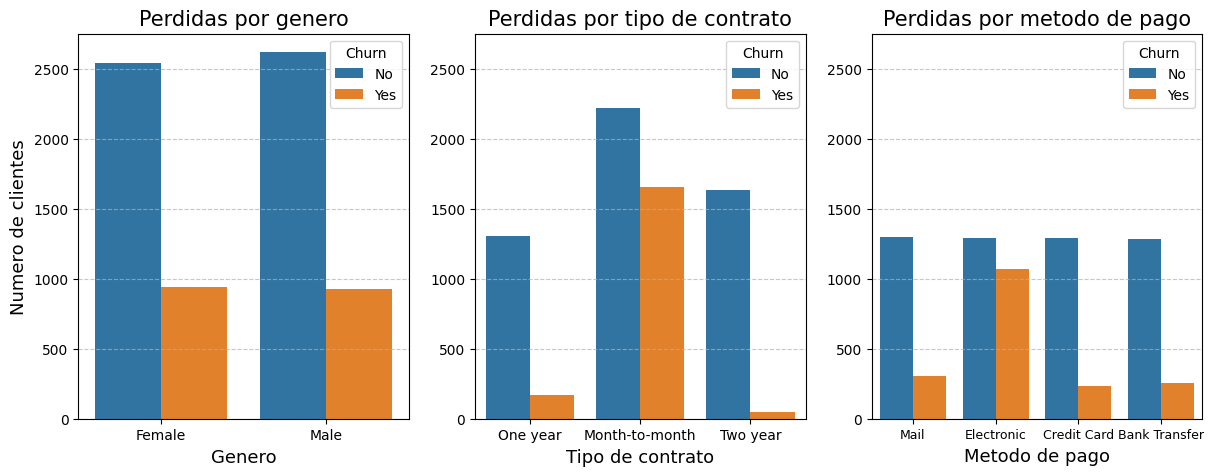

In [23]:
metodos_pago = ['Mail', 'Electronic', 'Credit Card', 'Bank Transfer']

fig, ax = plt.subplots(1, 3, figsize=(14.5, 5))

sns.countplot(data=df, x='customer.gender', hue='Churn', ax=ax[0])
ax[0].set_title('Perdidas por genero', loc='center', fontsize=15)
ax[0].set_xlabel('Genero', fontsize=13)
ax[0].set_ylabel('Numero de clientes', fontsize=13)

sns.countplot(data=df, x='account.Contract', hue='Churn', ax=ax[1])
ax[1].set_title('Perdidas por tipo de contrato', loc='center', fontsize=15)
ax[1].set_xlabel('Tipo de contrato', fontsize=13)
ax[1].set_ylabel('', fontsize=13)

sns.countplot(data=df, x='account.PaymentMethod', hue='Churn', ax=ax[2])
ax[2].set_title('Perdidas por metodo de pago', loc='center', fontsize=15)
ax[2].set_xticklabels(metodos_pago, fontsize=9)
ax[2].set_xlabel('Metodo de pago', fontsize=13)
ax[2].set_ylabel('', fontsize=13)

ymin = 0
ymax = 2750

for axs in ax.ravel():
  axs.set_ylim(ymin, ymax)
  axs.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [24]:
df.head(2)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4


### 4. En este paso, explora cómo las variables numéricas, como **"total gastado"** o **"tiempo de contrato"**, se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron. Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

In [25]:
import numpy as np

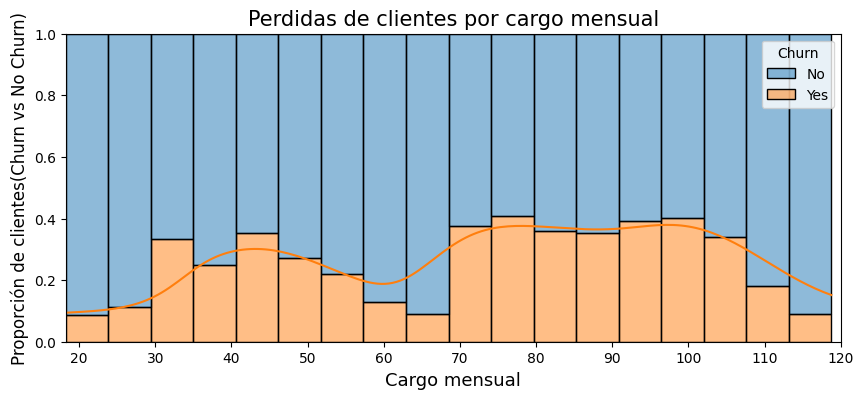

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))

ax = sns.histplot(data=df, x='account.Charges.Monthly', hue='Churn', kde=True, ax=ax, multiple="fill")
ax.set_title('Perdidas de clientes por cargo mensual', loc='center', fontsize=15)
ax.set_xticks(np.arange(20, 130, 10))
ax.set_xlabel('Cargo mensual', fontsize=13)
ax.set_ylabel('Proporción de clientes(Churn vs No Churn)', fontsize=12)

plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

In [28]:
df['account.Contract'].value_counts()

,count
account.Contract,
Month-to-month,3875
Two year,1685
One year,1472


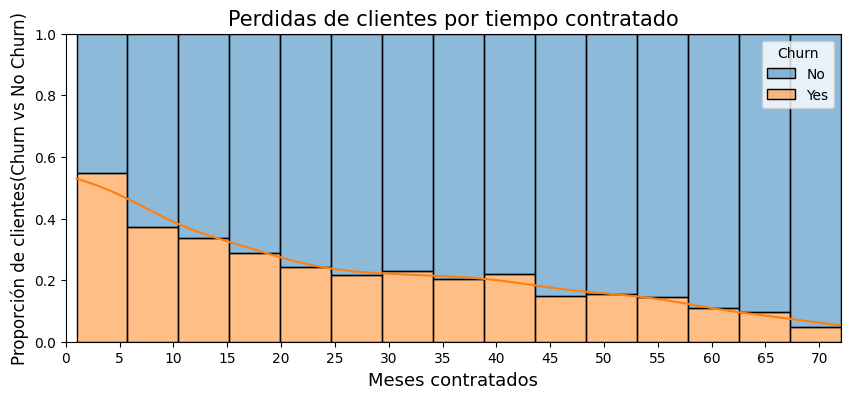

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))

ax = sns.histplot(data=df, x='customer.tenure', hue='Churn', kde=True, ax=ax, multiple="fill")
ax.set_title('Perdidas de clientes por tiempo contratado', loc='center', fontsize=15)
ax.set_xticks(np.arange(0, 75, 5))
ax.set_xlabel('Meses contratados', fontsize=13)
ax.set_ylabel('Proporción de clientes(Churn vs No Churn)', fontsize=12)

plt.show()

#📄Informe final

## 1. Perdida de clientes:
- **Insight:** La base de datos analizada presenta un total de 7,032 registros. Se observa que la tasa de deserción es del 26.6% (1,869 clientes). Este porcentaje sirve como métrica de referencia para evaluar el éxito de las futuras estrategias de retención. Cualquier acción estratégica debe aspirar a reducir este indicador hacia niveles más competitivos en el mercado (generalmente por debajo del 15-20%).


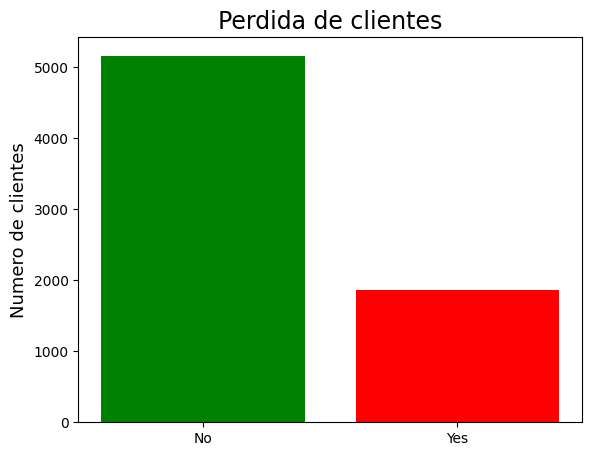

## 2. Perdidas según variables categoricas:
- **Perdidas por genero:** El género no es un factor determinante para la evasión. Tanto hombres como mujeres abandonan la empresa en la misma proporción. No es necesario crear campañas diferenciadas por género.
- **Perdidas por tipo de contrato:** Este es un punto crítico. Los clientes sin compromiso a largo plazo son los que más se fugan. El contrato mensual es el principal foco de inestabilidad para Telecom X.
- **Perdidas por metodo de pago:** Existe una fricción o insatisfacción ligada al pago con cheque electrónico. Los clientes que automatizan su pago (tarjeta/banco) tienden a quedarse mucho más tiempo.

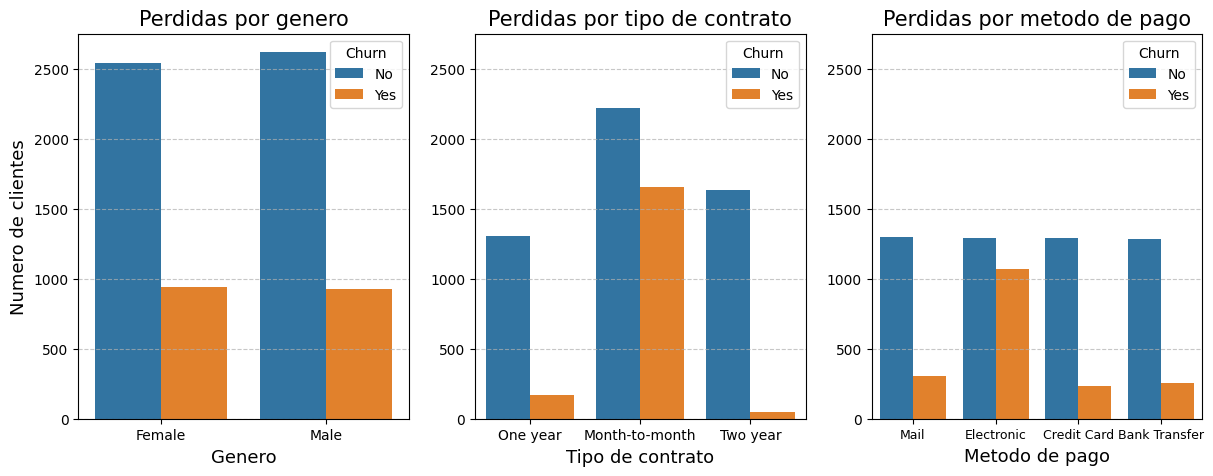

## 3. Perdidas de clientes por cargo mensual:
- **Bajo Riesgo ($20 - $30):** En los cargos más bajos, la franja naranja es mínima. Esto indica que los clientes con planes básicos son los más estables y satisfechos con la relación costo-beneficio.
- **Incremento de Fuga ($30 - $70):** A medida que el cargo mensual sube, la proporción de clientes que se van crece de manera constante.
- **Punto Crítico ($70 - $110):** Aquí es donde el problema es más grave. La franja naranja alcanza su mayor grosor, lo que significa que el riesgo de pérdida es máximo en los clientes que más ingresos aportan a la empresa.
- **Insight:** Existe una "barrera de precio" cerca de los $70 USD. Superado ese monto, la percepción de valor del cliente disminuye o la competencia se vuelve más atractiva, provocando que casi el 40% de este segmento abandone la compañía.

- **Insight final:** El análisis de cargos mensuales revela que la deserción no es uniforme. Se identificó que el riesgo de Churn es directamente proporcional al costo del servicio. El segmento de clientes premium ($70 - $110 USD) presenta la mayor tasa de abandono, lo que sugiere una debilidad en la estrategia de retención para los usuarios de alto valor, quienes son más propensos a cambiar de proveedor ante ofertas competitivas.

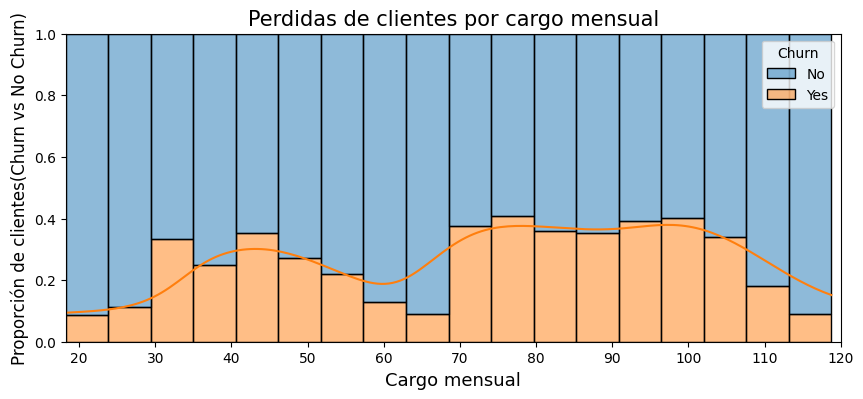

## 4. Perdidas de clientes por tiempo contratado:
- **El "Punto de Fuga" Inicial:** Durante los primeros 1 a 5 meses, la probabilidad de que un cliente se retire es superior al 50%. Este es el momento de mayor riesgo para la empresa.
- **Tendencia de Estabilización:** A medida que los meses contratados aumentan, la franja naranja se reduce drásticamente. Si un cliente supera los 20 meses, la probabilidad de abandono baja considerablemente.
- **Fidelidad a Largo Plazo:** Al llegar a los 60-70 meses (5-6 años), la deserción es casi inexistente. Los clientes sobrevivientes a esta etapa son extremadamente leales.
- **Insight:** Telecom X tiene un problema de retención temprana. La empresa pierde a la mitad de sus clientes antes de que estos cumplan su primer medio año, lo que sugiere que no se está logrando "enamorar" al cliente durante el periodo de bienvenida o onboarding.
- **Insight final:** El análisis del tiempo de permanencia demuestra que el riesgo de Churn es inversamente proporcional a la antigüedad del cliente. Existe una crisis de retención en los nuevos usuarios, con una probabilidad de abandono superior al 50% en el primer semestre. Sin embargo, una vez que el cliente supera la barrera de los 24 meses, la lealtad se consolida, reduciendo el riesgo de fuga a niveles mínimos.

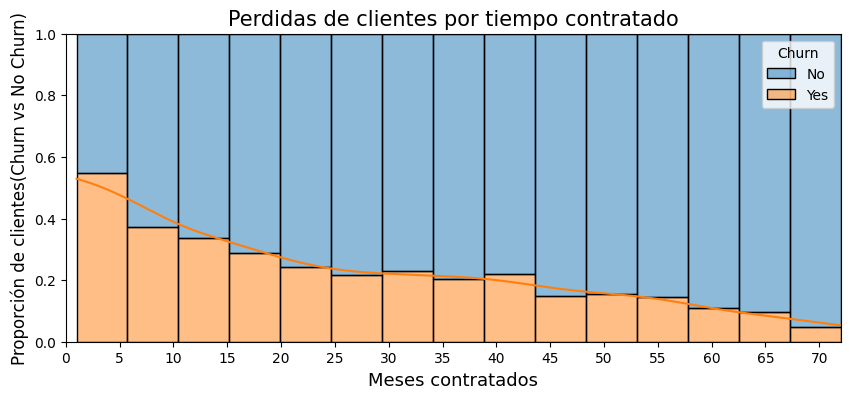

# ✅Recomendaciones

### **1. Sobre la Tasa General de Perdida (Churn)**
- **Establecer un sistema de "Alerta Temprana":** Dado que el 26.6% de los clientes se va, es necesario crear un tablero de control (dashboard) que monitoree semanalmente este indicador para reaccionar antes de que la cifra aumente.
- **Encuestas de salida:** Implementar encuestas obligatorias para ese grupo de 1,869 clientes que se fueron, con el fin de tipificar si la razón principal es el precio, la competencia o la calidad del soporte.

### **2. Sobre Variables Categóricas (Contrato y Pago)**
- **Incentivar la Migración de Contrato:** Crear una promoción (ej. un mes gratis o descuento) para los clientes "Mes a Mes" que acepten pasar a un contrato de 1 o 2 años. Esto "blinda" al cliente y reduce drásticamente la probabilidad de fuga.
- **Digitalización y Domiciliación de Pagos:** Dado que el "Cheque Electrónico" tiene alta deserción, se debe incentivar el uso de Tarjeta de Crédito o Transferencia Automática mediante pequeños beneficios o recordatorios, ya que los pagos automatizados generan una mayor permanencia.

### **3. Sobre los Cargos Mensuales (Clientes Premium)**
- **Programa de Fidelización "High-Value":** Los clientes que pagan más de $70 USD deben recibir un trato preferencial. Se recomienda asignarles un canal de soporte técnico prioritario o beneficios exclusivos (como mayor velocidad o servicios de streaming incluidos) para que sientan que el alto costo justifica el valor recibido.

- **Auditoría de Precios vs. Competencia:** Revisar si los planes de $70-$100 USD están desfasados respecto a la competencia, ya que este grupo es el más sensible a las ofertas externas.

### **4. Sobre el Tiempo Contratado (Nuevos Clientes)**
- **Plan de "Onboarding" de 6 meses:** La prioridad absoluta debe ser retener al cliente en su primer semestre. Se sugiere enviar correos de seguimiento, llamadas de cortesía al segundo mes para verificar la satisfacción y ofrecer descuentos exclusivos al cumplir el 4º mes, que es justo antes de que muchos decidan irse.
- **Bonos de Permanencia:** Ofrecer una recompensa clara por llegar al primer año de servicio para motivar al cliente a cruzar la "barrera crítica" de los primeros meses.

### **5. Conclusión final**
- En resumen, la estrategia de Telecom X debe centrarse en convertir contratos mensuales en anuales, automatizar métodos de pago y proteger intensamente a los clientes nuevos y de alto valor durante sus primeros 6 meses. Estas acciones podrían reducir la tasa de Churn actual del 26.6% a niveles mucho más saludables.